<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.062709,51.476250,88.691845,0.000614,243.231418,243.230935,0.000482
1,0.0,1.0,89.270002,33.527407,46.745690,-0.001135,179.541964,179.542959,-0.000995
2,0.0,2.0,49.400326,33.035152,88.704256,0.000117,181.139851,181.139860,-0.000010
3,0.0,3.0,39.651183,83.607242,38.673814,0.000237,171.932477,171.932189,0.000288
4,0.0,4.0,41.383203,83.369073,22.045578,-0.000144,156.797710,156.797707,0.000004
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.432246,20.061522,75.186159,-0.002355,196.677573,196.679500,-0.001927
59996,999.0,56.0,96.454521,25.346948,96.689162,-0.003778,228.486854,228.489988,-0.003135
59997,999.0,57.0,34.007986,70.583328,90.028480,-0.000277,204.619517,204.619784,-0.000268
59998,999.0,58.0,59.341899,48.974696,75.058920,-0.000267,193.375249,193.375392,-0.000143


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.062709  51.476250  88.691845  ...  243.231418  243.230935  0.000482
      1.0    89.270002  33.527407  46.745690  ...  179.541964  179.542959 -0.000995
      2.0    49.400326  33.035152  88.704256  ...  181.139851  181.139860 -0.000010
      3.0    39.651183  83.607242  38.673814  ...  171.932477  171.932189  0.000288
      4.0    41.383203  83.369073  22.045578  ...  156.797710  156.797707  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   91.432246  20.061522  75.186159  ...  196.677573  196.679500 -0.001927
      56.0   96.454521  25.346948  96.689162  ...  228.486854  228.489988 -0.003135
      57.0   34.007986  70.583328  90.028480  ...  204.619517  204.619784 -0.000268
      58.0   59.341899  48.974696  75.058920  ...  193.375249  193.375392 -0.000143
      59.0   41.579053  70.206632  85.868185  ...  207.654047  207.653830  0.000217

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.062709  51.476250  88.691845  ...  243.231418  243.230935  0.000482
      1.0    89.270002  33.527407  46.745690  ...  179.541964  179.542959 -0.000995
      2.0    49.400326  33.035152  88.704256  ...  181.139851  181.139860 -0.000010
      3.0    39.651183  83.607242  38.673814  ...  171.932477  171.932189  0.000288
      4.0    41.383203  83.369073  22.045578  ...  156.797710  156.797707  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   91.432246  20.061522  75.186159  ...  196.677573  196.679500 -0.001927
      56.0   96.454521  25.346948  96.689162  ...  228.486854  228.489988 -0.003135
      57.0   34.007986  70.583328  90.028480  ...  204.619517  204.619784 -0.000268
      58.0   59.341899  48.974696  75.058920  ...  193.375249  193.375392 -0.000143
      59.0   41.579053  70.206632  85.868185  ...  207.654047  207.653830  0.000217

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.062709,51.476250,88.691845,0.000614,243.231418,243.230935,0.000482
1,0.0,1.0,89.270002,33.527407,46.745690,-0.001135,179.541964,179.542959,-0.000995
2,0.0,2.0,49.400326,33.035152,88.704256,0.000117,181.139851,181.139860,-0.000010
3,0.0,3.0,39.651183,83.607242,38.673814,0.000237,171.932477,171.932189,0.000288
4,0.0,4.0,41.383203,83.369073,22.045578,-0.000144,156.797710,156.797707,0.000004
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,91.432246,20.061522,75.186159,-0.002355,196.677573,196.679500,-0.001927
59996,999.0,56.0,96.454521,25.346948,96.689162,-0.003778,228.486854,228.489988,-0.003135
59997,999.0,57.0,34.007986,70.583328,90.028480,-0.000277,204.619517,204.619784,-0.000268
59998,999.0,58.0,59.341899,48.974696,75.058920,-0.000267,193.375249,193.375392,-0.000143


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.062709  51.476250  88.691845  ...  243.231418  243.230935  0.000482
      1.0    89.270002  33.527407  46.745690  ...  179.541964  179.542959 -0.000995
      2.0    49.400326  33.035152  88.704256  ...  181.139851  181.139860 -0.000010
      3.0    39.651183  83.607242  38.673814  ...  171.932477  171.932189  0.000288
      4.0    41.383203  83.369073  22.045578  ...  156.797710  156.797707  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   91.432246  20.061522  75.186159  ...  196.677573  196.679500 -0.001927
      56.0   96.454521  25.346948  96.689162  ...  228.486854  228.489988 -0.003135
      57.0   34.007986  70.583328  90.028480  ...  204.619517  204.619784 -0.000268
      58.0   59.341899  48.974696  75.058920  ...  193.375249  193.375392 -0.000143
      59.0   41.579053  70.206632  85.868185  ...  207.654047  207.653830  0.000217

[60000 rows x 7 columns]

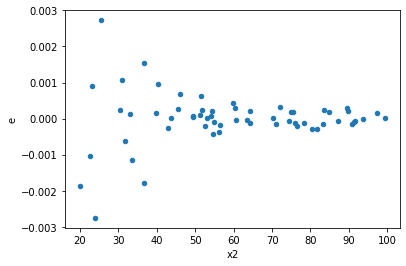

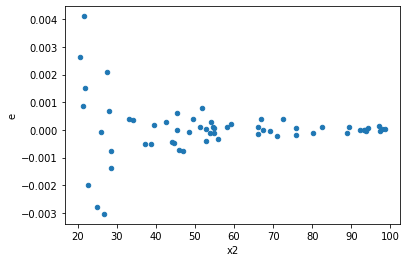

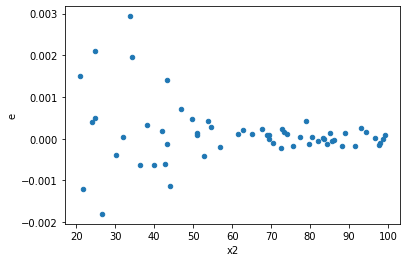

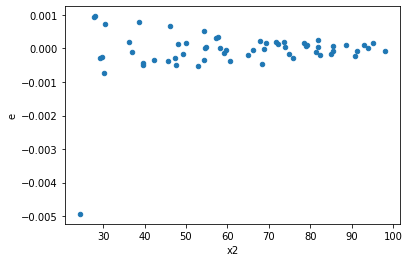

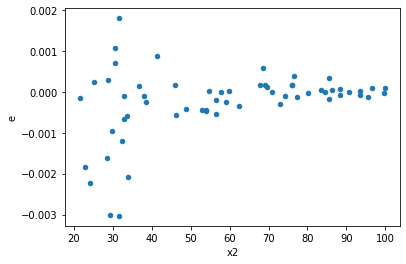

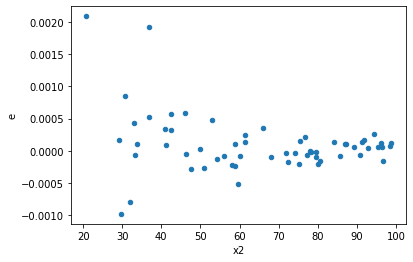

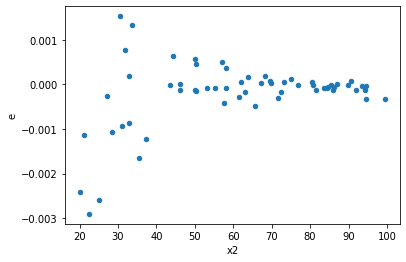

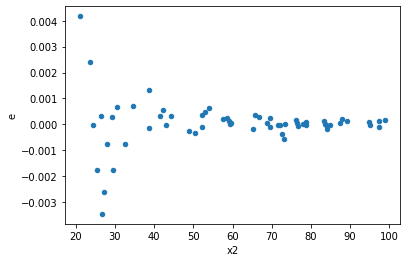

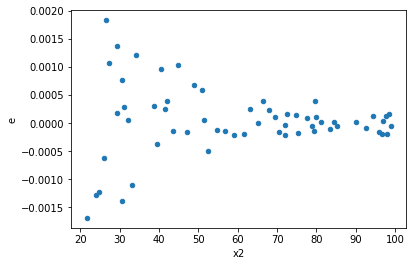

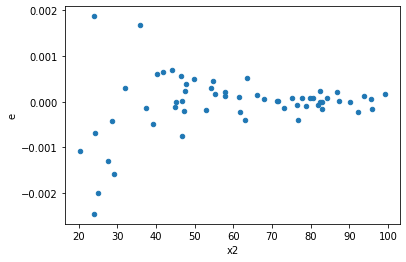

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,24.0,30.0,2.094543677816964e-06,2.4042745307969154e-05,8.72726532423735e-08,8.014248435989718e-07,9.183000789184852,6.293108323340846e-08,0.9999999685344584,3.146554161670423e-08,Reject001=0 : Heteroscedasticity
4.0,27.0,27.0,9.519606443271393e-07,3.1059205581596934e-05,3.52578016417459e-08,1.1503409474665532e-06,32.626564728996826,3.530509218307998e-14,0.9999999999999823,1.765254609153999e-14,Reject001=0 : Heteroscedasticity
6.0,27.0,27.0,1.357730805701565e-05,1.4319486840561679e-05,5.028632613709499e-07,5.303513644652474e-07,1.05466317626656,0.8910376953856216,0.5544811523071892,0.4455188476928108,Reject001=1 : Homoscedasticity
8.0,26.0,28.0,8.573837961133012e-07,2.0387106572364828e-05,3.297629985051158e-08,7.281109490130296e-07,22.07982558121159,2.511990615516879e-12,0.999999999998744,1.2559953077584396e-12,Reject001=0 : Heteroscedasticity
10.0,29.0,25.0,8.718617997359574e-07,1.477585294957798e-05,3.006419999089508e-08,5.910341179831192e-07,19.65906686897085,7.405187574249794e-11,0.9999999999629741,3.702593787124897e-11,Reject001=0 : Heteroscedasticity
12.0,24.0,30.0,7.342051292999644e-07,1.8853262249482025e-05,3.059188038749852e-08,6.284420749827342e-07,20.542773671393842,2.014610700484809e-12,0.9999999999989927,1.0073053502424045e-12,Reject001=0 : Heteroscedasticity
15.0,29.0,25.0,9.440898123873436e-06,1.5517258560827487e-05,3.255482111680495e-07,6.206903424330994e-07,1.9066003778859537,0.1051262020010364,0.9474368989994818,0.0525631010005182,Reject001=1 : Homoscedasticity
16.0,27.0,27.0,2.7972974500615752e-06,4.279722023274523e-06,1.0360360926153982e-07,1.585082230842416e-07,1.529948852303968,0.2754632889478785,0.8622683555260607,0.13773164447393926,Reject001=1 : Homoscedasticity
17.0,27.0,27.0,1.4107368468233561e-05,1.474383856787344e-05,5.224951284530948e-07,5.460680951064237e-07,1.0451161462942615,0.909565201517547,0.5452173992412265,0.4547826007587735,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,27.0,2.023542790190697e-05,8.690557556918462e-06,7.494602926632211e-07,3.218725021080912e-07,0.42947238867627163,0.0319682329567097,Reject001=1 : Homoscedasticity
1.0,35.0,19.0,5.121352517491478e-05,3.027413488889598e-07,1.4632435764261365e-06,1.5933755204682094e-08,0.010889338905282677,5.3043254654895536e-24,Reject001=0 : Heteroscedasticity
2.0,22.0,32.0,2.524984041064688e-05,8.47229181678868e-07,1.1477200186657673e-06,2.6475911927464625e-08,0.02306826708332844,1.671689834256581e-13,Reject001=0 : Heteroscedasticity
3.0,24.0,30.0,2.094543677816964e-06,2.4042745307969154e-05,8.72726532423735e-08,8.014248435989718e-07,9.183000789184852,6.293108323340846e-08,Reject001=0 : Heteroscedasticity
4.0,27.0,27.0,9.519606443271393e-07,3.1059205581596934e-05,3.52578016417459e-08,1.1503409474665532e-06,32.626564728996826,3.530509218307998e-14,Reject001=0 : Heteroscedasticity
5.0,25.0,29.0,9.001154593923955e-06,7.010331567313621e-07,3.600461837569582e-07,2.4173557128667656e-08,0.06714015651110336,1.7058249164645627e-09,Reject001=0 : Heteroscedasticity
6.0,27.0,27.0,1.357730805701565e-05,1.4319486840561679e-05,5.028632613709499e-07,5.303513644652474e-07,1.05466317626656,0.8910376953856216,Reject001=1 : Homoscedasticity
7.0,25.0,29.0,2.927122853620291e-05,2.119363109215083e-05,1.1708491414481164e-06,7.308148652465804e-07,0.6241750874435473,0.23482905859331435,Reject001=1 : Homoscedasticity
8.0,26.0,28.0,8.573837961133012e-07,2.0387106572364828e-05,3.297629985051158e-08,7.281109490130296e-07,22.07982558121159,2.511990615516879e-12,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    631
Reject001=1 : Homoscedasticity      369
Name: Result_test, dtype: int64